In [1]:
#SAMPLE DATA SET
import pandas as pd

pizza = {'diameter': [12, 16, 20, 24, 28],
         'harga': [8.5, 12, 15.5, 20, 22.5]}

pizza_df = pd.DataFrame(pizza)
print(pizza_df)


   diameter  harga
0        12    8.5
1        16   12.0
2        20   15.5
3        24   20.0
4        28   22.5


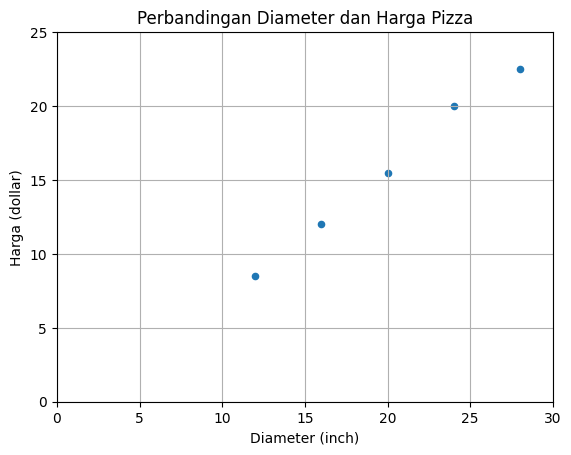

In [2]:
#VISUALISASI DATA SET
import matplotlib.pyplot as plt

pizza_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 30)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

In [3]:
#TRANSFORMASI DATA SET
import numpy as np

x = np.array(pizza_df['diameter'])
y = np.array(pizza_df['harga'])

print(f'x: {x}')
print(f'y: {y}')

x: [12 16 20 24 28]
y: [ 8.5 12.  15.5 20.  22.5]


In [4]:
x = x.reshape(-1, 1)
x.shape

(5, 1)

In [5]:
x

array([[12],
       [16],
       [20],
       [24],
       [28]], dtype=int64)

In [7]:
#TRAINING SIMPLE LINIER REGRESSION MODEL
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)


LinearRegression()

In [8]:
#VISUALISASI SIMPLE LINIER REGRESSION MODEL
X_vis = np.array([0, 25]).reshape(-1,1)
y_vis = model.predict(X_vis)

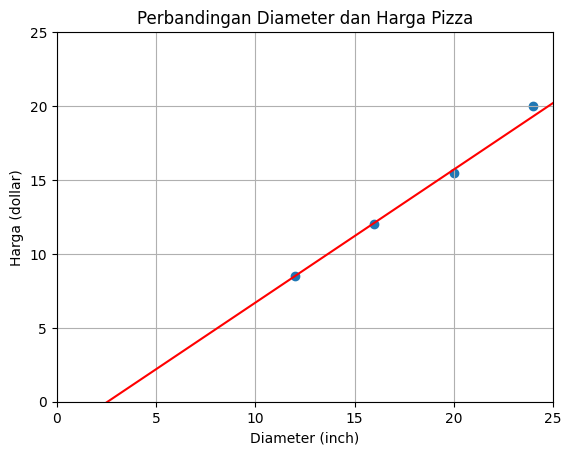

In [11]:
import matplotlib.pyplot as plt
plt.scatter(x, y)

plt.plot(X_vis, y_vis, '-r')
plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()


In [12]:
print(f'intercept : {model.intercept_}')
print(f'slope : {model.coef_}')


intercept : -2.3000000000000007
slope : [0.9]


In [15]:
# MENCARI NILAI SLOPE
import numpy as np

print(f'X:\n{x}\n')
print(f'X flatten: {np.array(x).flatten()}\n')
print(f'y: {y}')



X:
[[12]
 [16]
 [20]
 [24]
 [28]]

X flatten: [12 16 20 24 28]

y: [ 8.5 12.  15.5 20.  22.5]


In [16]:
#VARIANCE
variance_x = np.var(x.flatten(), ddof=1)

print(f'variance: {variance_x}')

variance: 40.0


In [17]:
#COVARIANCE
np.cov(x.flatten(), y)

array([[40.   , 36.   ],
       [36.   , 32.575]])

In [19]:
import numpy as np

X_array = np.asarray(x)
covariance_xy = np.cov(X_array.flatten(), y)[0][1]
print(f'covariance: {covariance_xy}')


covariance: 36.0


In [20]:
#SLOPE
slope = covariance_xy / variance_x

print(f'slope:{slope}')

slope:0.9


In [22]:
#MENCARI NILAI INTERCEPT
intecept = np.mean(y) - slope * np.mean(x)

print(f'intercept: {intecept}')

intercept: -2.3000000000000007


In [23]:
#PREDIKSI HARGA PIZZA
diameter_pizza = np.array([12, 20, 23]).reshape(-1, 1)
diameter_pizza

array([[12],
       [20],
       [23]])

In [24]:
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([ 8.5, 15.7, 18.4])

In [25]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga):
    print(f'diameter: {dmtr} prediksi harga: {hrg}')

diameter: [12] prediksi harga: 8.499999999999998
diameter: [20] prediksi harga: 15.7
diameter: [23] prediksi harga: 18.4


In [26]:
#EVALUASI SIMPLE LINEAR REGRESSION MODEL
#TRAINING & TESTING DATASET

X_train = np.array([6, 8, 10, 14, 18]). reshape(-1, 1)
y_train = np.array([7, 9, 13, 17.5, 18])

X_test = np.array([12, 16, 11, 9, 8]). reshape(-1, 1)
y_test = np.array([11, 18, 15, 8.5, 12])

In [27]:
# TRAINING SIMPLE LINEAR REGRESSION MODEL
model = LinearRegression() 
model.fit(X_train, y_train)


LinearRegression()

In [28]:
#EVALUASI LINIER REGRESSION MODEL DENGAN COEFFICIENT OF DETERMINATION ATAU R-SQUARED
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.5821701988385819


In [29]:
#MENCARI NILAI R-SQUARED(R2)
# MENCARI NILAI SSres
ss_res = sum([(y_i - model.predict(x_i.reshape(-1, 1))[0])**2
              for x_i, y_i in zip (X_test, y_test)])
print(f'ss_res: {ss_res}')

ss_res: 22.646375222948866


In [30]:
#SStot
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print(f'ss_tot: {ss_tot}')

ss_tot: 54.2


In [31]:
#R2
r_squared = 1 - (ss_res / ss_tot)

print(f'R-squared: {r_squared}')

R-squared: 0.5821701988385819
